In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 

In [2]:
database = 'ipldatabase.sqlite'

In [3]:
conn = sqlite3.connect(database)
cursor = conn.cursor()

tables = pd.read_sql (""" SELECT name FROM sqlite_master
                          WHERE type = 'table'; """, conn)

In [4]:
tables

,name
0,Player
1,Extra_Runs
2,Batsman_Scored
3,Batting_Style
4,Bowling_Style
5,Country
6,Season
7,City
8,Outcome
9,Win_By


Analyzing the player table :-

In [5]:
player = pd.read_sql(""" SELECT * FROM Player
                        ; """, conn)

In [6]:
player

,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
0,1,SC Ganguly,1972-07-08 00:00:00,1,1.0,1
1,2,BB McCullum,1981-09-27 00:00:00,2,1.0,4
2,3,RT Ponting,1974-12-19 00:00:00,2,1.0,5
3,4,DJ Hussey,1977-07-15 00:00:00,2,2.0,5
4,5,Mohammad Hafeez,1980-10-17 00:00:00,2,2.0,6
...,...,...,...,...,...,...
464,465,DL Chahar,1992-08-07 00:00:00,2,1.0,1
465,466,P Dharmani,1974-09-27 00:00:00,2,NaN,1
466,467,RV Pawar,1979-09-06 00:00:00,1,7.0,1
467,468,KH Devdhar,1989-12-14 00:00:00,2,NaN,1


In [7]:
player_age = pd.read_sql("""SELECT Player_Name, DOB
                            FROM Player
                            ORDER BY DOB;""", conn)
player_age

,Player_Name,DOB
0,ST Jayasuriya,1969-06-30 00:00:00
1,SK Warne,1969-09-13 00:00:00
2,DS Lehmann,1970-02-05 00:00:00
3,GD McGrath,1970-02-09 00:00:00
4,SB Joshi,1970-06-06 00:00:00
...,...,...
464,Mustafizur Rahman,1995-09-06 00:00:00
465,S Kaushik,1995-09-07 00:00:00
466,RR Pant,1997-10-04 00:00:00
467,SN Khan,1997-10-27 00:00:00


# Finding the oldest 20 players

In [8]:
pd.read_sql("""SELECT Player_Name, DOB
               FROM Player
               ORDER BY DOB
               LIMIT 20;""", conn)

,Player_Name,DOB
0,ST Jayasuriya,1969-06-30 00:00:00
1,SK Warne,1969-09-13 00:00:00
2,DS Lehmann,1970-02-05 00:00:00
3,GD McGrath,1970-02-09 00:00:00
4,SB Joshi,1970-06-06 00:00:00
5,A Kumble,1970-10-17 00:00:00
6,GB Hogg,1971-02-06 00:00:00
7,PV Tambe,1971-10-08 00:00:00
8,DR Martyn,1971-10-21 00:00:00
9,ML Hayden,1971-10-29 00:00:00


# Finding the youngest 20 players

In [9]:
pd.read_sql("""SELECT Player_Name, DOB
               FROM Player
               ORDER BY DOB DESC
               LIMIT 20;""", conn)

,Player_Name,DOB
0,Ishan Kishan,1998-07-18 00:00:00
1,SN Khan,1997-10-27 00:00:00
2,RR Pant,1997-10-04 00:00:00
3,S Kaushik,1995-09-07 00:00:00
4,Mustafizur Rahman,1995-09-06 00:00:00
5,DJ Hooda,1995-04-19 00:00:00
6,Kuldeep Yadav,1994-12-14 00:00:00
7,SS Iyer,1994-12-06 00:00:00
8,VH Zol,1994-11-23 00:00:00
9,SV Samson,1994-11-11 00:00:00


Analyzing the country table :-

In [10]:
country = pd.read_sql ("""SELECT * FROM country;""",conn)
country

,Country_Id,Country_Name
0,1,India
1,2,South Africa
2,3,U.A.E
3,4,New Zealand
4,5,Australia
5,6,Pakistan
6,7,Sri Lanka
7,8,West Indies
8,9,Zimbabwea
9,10,England


# Finding the players and their corresponding country

In [11]:
pd.read_sql("""SELECT * 
               FROM Player
               INNER JOIN Country
               ON Player.Country_Name = Country.Country_Id;""", conn)

,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Country_Id,Country_Name
0,1,SC Ganguly,1972-07-08 00:00:00,1,1.0,1,1,India
1,2,BB McCullum,1981-09-27 00:00:00,2,1.0,4,4,New Zealand
2,3,RT Ponting,1974-12-19 00:00:00,2,1.0,5,5,Australia
3,4,DJ Hussey,1977-07-15 00:00:00,2,2.0,5,5,Australia
4,5,Mohammad Hafeez,1980-10-17 00:00:00,2,2.0,6,6,Pakistan
...,...,...,...,...,...,...,...,...
464,465,DL Chahar,1992-08-07 00:00:00,2,1.0,1,1,India
465,466,P Dharmani,1974-09-27 00:00:00,2,NaN,1,1,India
466,467,RV Pawar,1979-09-06 00:00:00,1,7.0,1,1,India
467,468,KH Devdhar,1989-12-14 00:00:00,2,NaN,1,1,India


In [12]:
player_country = pd.read_sql("""SELECT Player_Name, country.Country_Name
               FROM Player
               INNER JOIN Country
               ON Player.Country_Name = Country.Country_Id;""", conn)
player_country

,Player_Name,Country_Name
0,SC Ganguly,India
1,BB McCullum,New Zealand
2,RT Ponting,Australia
3,DJ Hussey,Australia
4,Mohammad Hafeez,Pakistan
...,...,...
464,DL Chahar,India
465,P Dharmani,India
466,RV Pawar,India
467,KH Devdhar,India


# How many players are their from each country?

In [13]:
num_players = pd.read_sql("""SELECT COUNT(country.Country_Name) AS number_of_players, country.Country_Name
               FROM Player
               INNER JOIN Country
               ON Player.Country_Name = Country.Country_Id
               
               GROUP BY country.Country_Name
               ORDER BY number_of_players DESC;""", conn)
num_players

,number_of_players,Country_Name
0,262,India
1,72,Australia
2,39,South Africa
3,22,New Zealand
4,20,Sri Lanka
5,19,West Indies
6,14,England
7,13,Pakistan
8,5,Bangladesh
9,2,Zimbabwea


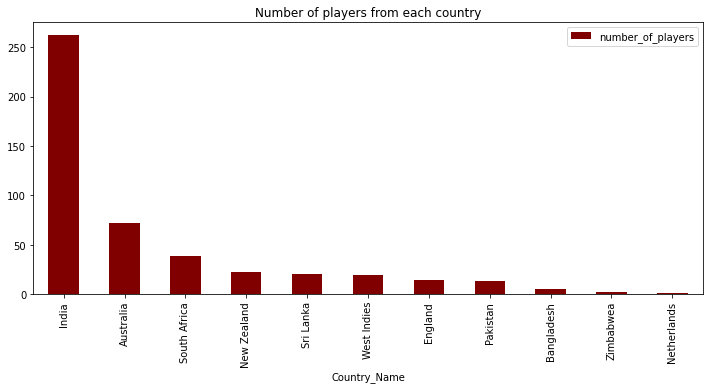

In [14]:
num_players.plot (kind = 'bar' ,x = 'Country_Name', y = 'number_of_players',  
                  figsize= (12,5), color ='maroon' ,title = 'Number of players from each country')

# Finding the Batting and Bowling style of players

In [16]:
pd.read_sql ("""SELECT Player_Id, Player_Name, Batting_Style.Batting_hand, Bowling_Style.Bowling_skill
                FROM Player
                INNER JOIN Batting_Style 
                ON Player.Batting_hand = Batting_Style.Batting_Id
                INNER JOIN Bowling_Style
                ON Player.Bowling_skill = Bowling_Style.Bowling_Id;""", conn)

,Player_Id,Player_Name,Batting_hand,Bowling_skill
0,1,SC Ganguly,Left-hand bat,Right-arm medium
1,2,BB McCullum,Right-hand bat,Right-arm medium
2,3,RT Ponting,Right-hand bat,Right-arm medium
3,4,DJ Hussey,Right-hand bat,Right-arm offbreak
4,5,Mohammad Hafeez,Right-hand bat,Right-arm offbreak
...,...,...,...,...
421,463,T Shamsi,Right-hand bat,Slow left-arm chinaman
422,464,SM Boland,Right-hand bat,Right-arm fast-medium
423,465,DL Chahar,Right-hand bat,Right-arm medium
424,467,RV Pawar,Left-hand bat,Slow left-arm orthodox


Creating a view of the query above :-

In [17]:
cursor.execute("DROP VIEW IF EXISTS bat_bowl_style")
cursor.execute("""
  CREATE VIEW
  bat_bowl_style (Player_Id, Player_Name, Batting_hand, Bowling_skill)
  AS
  SELECT Player_Id, Player_Name, Batting_Style.Batting_hand, Bowling_Style.Bowling_skill
                FROM Player
                INNER JOIN Batting_Style 
                ON Player.Batting_hand = Batting_Style.Batting_Id
                INNER JOIN Bowling_Style
                ON Player.Bowling_skill = Bowling_Style.Bowling_Id
  """)

In [18]:
bat_style = pd.read_sql("""SELECT COUNT(Batting_hand) AS number, Batting_hand
                           FROM bat_bowl_style
                           
                           GROUP BY Batting_hand;""", conn)
bat_style

,number,Batting_hand
0,113,Left-hand bat
1,313,Right-hand bat


So, out of 426 players, 313 players are right handed batsmen, while the rest 113 players are left handed.

In [20]:
bowl_style = pd.read_sql("""SELECT COUNT(Bowling_skill) AS number, Bowling_skill
                            FROM bat_bowl_style
                            GROUP BY Bowling_skill
                            ORDER BY number DESC;""", conn)
bowl_style

,number,Bowling_skill
0,104,Right-arm medium
1,81,Right-arm offbreak
2,53,Right-arm fast-medium
3,44,Slow left-arm orthodox
4,38,Right-arm medium-fast
5,24,Legbreak
6,21,Legbreak googly
7,20,Right-arm fast
8,13,Left-arm fast-medium
9,11,Left-arm medium


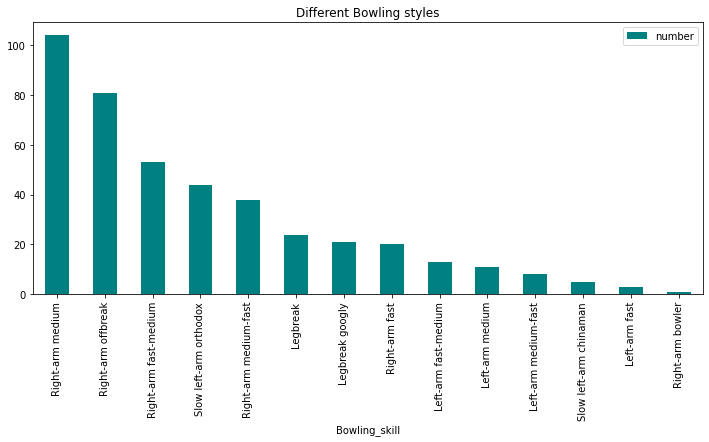

In [23]:
bowl_style.plot(kind ='bar', x = 'Bowling_skill', y = 'number',
               figsize = (12,5), color = 'teal', title = 'Different Bowling styles')

It is observed that Right arm bowlers too are more common than left arm ones. Moreover, there are more medium pace bowlers than fast ones.

Analyzing the venue table :-

In [25]:
pd.read_sql("""SELECT * FROM Venue;""", conn)

,Venue_Id,Venue_Name,City_Id
0,1,M Chinnaswamy Stadium,1
1,2,"Punjab Cricket Association Stadium, Mohali",2
2,3,Feroz Shah Kotla,3
3,4,Wankhede Stadium,4
4,5,Eden Gardens,5
5,6,Sawai Mansingh Stadium,6
6,7,"Rajiv Gandhi International Stadium, Uppal",7
7,8,"MA Chidambaram Stadium, Chepauk",8
8,9,Dr DY Patil Sports Academy,4
9,10,Newlands,9
